In [5]:
from MCG_module import MCG_g, MCG_tau_a, MCG_differential
import csv
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('default')
from pathlib import Path

# This function helps find the index of closest element to a value in an array
def find_nearest(array, value):
    i = np.abs(array - value).argmin()
    return i

# I is the nuclear spin.
I = 2.0
# J are the atomic spins, they must be apart by 1!
Jlist = [0.5,1.5,2.5]
# A are the corresponding hyperfine constants in Hz for each J. Also known as A_J.
# Since we are switching to Lorentz distribution along A we don't need this any more.
#Alist = [27589461401.0,5141611679.0,569522893.39]

# All times are in seconds, so remember to convert them to picoseconds (e-12)!
# tau_a is the mean atomic lifetime
tau_a = 10e-12
# tau_n is the mean nuclear lifetime
tau_n = 30e-12

This cell calculates $G_k$ over time (time differential).

<IPython.core.display.Javascript object>


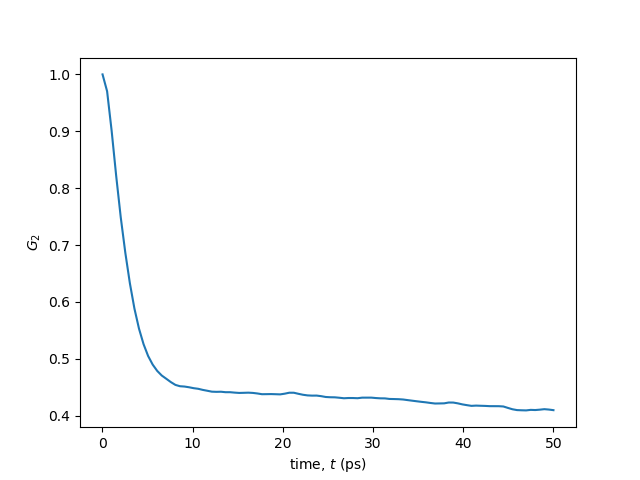

0.40926287123078264


In [107]:
# fixed_t_n=True gives every particle the same nuclear survival time
fixed_t_n=True
k = 2
tau_a = 100e-12
gf = 0.2
number_of_trials = 10000
initial = 0.01e-12
final = 50e-12
if fixed_t_n==True:
    tau_n = final+2e-12
steps = 100
cauchy_size=100000
cauchy_factor= 650

time_array, Gk_mean_array, transitions = MCG_differential(k,I,Jlist,tau_n,tau_a,gf,number_of_trials,initial, final, steps,cauchy_factor,cauchy_size,fixed_t_n)
avg_transitions = np.mean(transitions)
filename = f'G{k}diff{tau_a *1e12}ps_{gf}gf_{initial*1e12}ps-{final*1e12}ps'

plt.close()

plt.plot(time_array*1e12,Gk_mean_array)
plt.xlabel('time, $t$ (ps)')
plt.ylabel(f'$G_{k}$')
if fixed_t_n==True:
    plt.figtext(0.99, -0.06, f"$\\tau_a$: {tau_a*1e12:.4} ps   $g$: {gf}    initial $t$: {initial*1e12:.4} ps    final $t$: {final*1e12:.4} ps\n mean transitions: {avg_transitions:.4}    cauchy factor:{cauchy_factor}    # of steps: {steps}    # of trials: {number_of_trials}",horizontalalignment='right')
else:
    plt.figtext(0.99, -0.06, f"$\\tau_n$: {tau_n*1e12:.4} ps    $\\tau_a$: {tau_a*1e12:.4} ps   $g$: {gf}    initial $t$: {initial*1e12:.4} ps    final $t$: {final*1e12:.4} ps\n mean transitions: {avg_transitions:.4}    cauchy factor:{cauchy_factor}    # of steps: {steps}    # of trials: {number_of_trials}",horizontalalignment='right')
linearfig = plt.gcf()

print(min(Gk_mean_array))

<IPython.core.display.Javascript object>


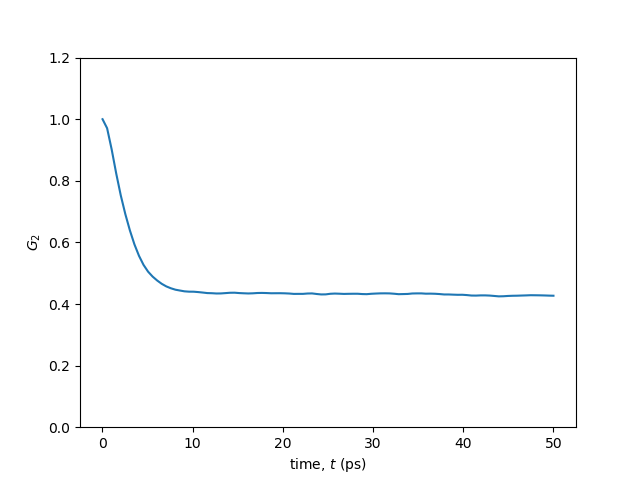

mean transitions: 0.126
steps = 100; gf = 1; tau_a = 200.0ps; ln(G_2) = -6.59e+09 t - 0.616; cf = 5000


In [104]:
plt.close()
plt.plot(time_array*1e12,Gk_mean_array)
plt.xlabel('time, $t$ (ps)')
plt.ylabel(f'$G_{k}$')
plt.ylim(0,1.2)
if fixed_t_n==True:
    plt.figtext(0.99, -0.06, f"$\\tau_a$: {tau_a*1e12:.4} ps   $g$: {gf}    initial $t$: {initial*1e12:.4} ps    final $t$: {final*1e12:.4} ps\n mean transitions: {avg_transitions:.4}    cauchy factor:{cauchy_factor}    # of steps: {steps}    # of trials: {number_of_trials}",horizontalalignment='right')
else:
    plt.figtext(0.99, -0.06, f"$\\tau_n$: {tau_n*1e12:.4} ps    $\\tau_a$: {tau_a*1e12:.4} ps   $g$: {gf}    initial $t$: {initial*1e12:.4} ps    final $t$: {final*1e12:.4} ps\n mean transitions: {avg_transitions:.4}    cauchy factor:{cauchy_factor}    # of steps: {steps}    # of trials: {number_of_trials}",horizontalalignment='right')
linearfig_unzoomed = plt.gcf()

print(f'mean transitions: {avg_transitions:.3}')
print(f"steps = {steps}; gf = {gf}; tau_a = {tau_a*1e12}ps; ln(G_{k}) = {a:.3} t {bphrase}; cf = {cauchy_factor}")

<IPython.core.display.Javascript object>


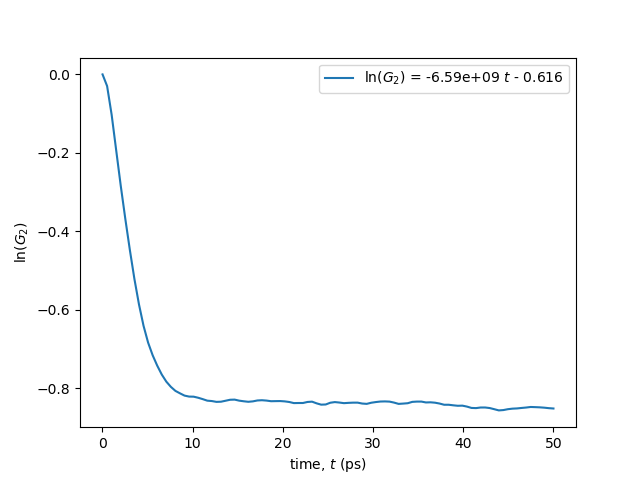

steps = 100; gf = 1; tau_a = 200.0ps; ln(G_2) = -6.59e+09 t - 0.616; cf = 5000


In [105]:
# This cell plots the logarithmic plot of the above.
plt.close()
a,b = np.polyfit(time_array,np.log(Gk_mean_array),1)
if b < 0:
    bphrase = f"- {abs(b):.3}"
else:
    bphrase = f"+ {abs(b):.3}"

if fixed_t_n == True:
    plt.figtext(0.99, -0.06, f"$\\tau_a$: {tau_a*1e12:.4} ps   $g$: {gf}    initial $t$: {initial*1e12:.4} ps    final $t$: {final*1e12:.4} ps\n mean transitions: {avg_transitions:.4}    cauchy factor:{cauchy_factor}    # of steps: {len(time_array)}    # of trials: {number_of_trials}",horizontalalignment='right')
else:
    plt.figtext(0.99, -0.06, f"$\\tau_n$: {tau_n*1e12:.4} ps    $\\tau_a$: {tau_a*1e12:.4} ps   $g$: {gf}    initial $t$: {initial*1e12:.4} ps    final $t$: {final*1e12:.4} ps\n mean transitions: {avg_transitions:.4}    cauchy factor:{cauchy_factor}    # of steps: {len(time_array)}    # of trials: {number_of_trials}",horizontalalignment='right')
plt.xlabel('time, $t$ (ps)')
plt.ylabel(f'ln($G_{k}$)')
plt.plot(time_array*1e12,np.log(Gk_mean_array),label=f'ln($G_{k}$) = {a:.3} $t$ {bphrase}')
plt.legend()
logfig = plt.gcf()
print(f"steps = {steps}; gf = {gf}; tau_a = {tau_a*1e12}ps; ln(G_{k}) = {a:.3} t {bphrase}; cf = {cauchy_factor}")

In [106]:
t_search = 8e-12
ti = find_nearest(time_array,t_search)
print(f"time = {time_array[ti]}, Gk = {Gk_mean_array[ti]}")

time = 8.08919191919192e-12, Gk = 0.4464533006669147


This cell truncates the time array to be within a given range.

steps = 7; gf = 1; tau_a = 100.0ps; ln(G_2) = -1.59e+11 t + 0.0468


<IPython.core.display.Javascript object>


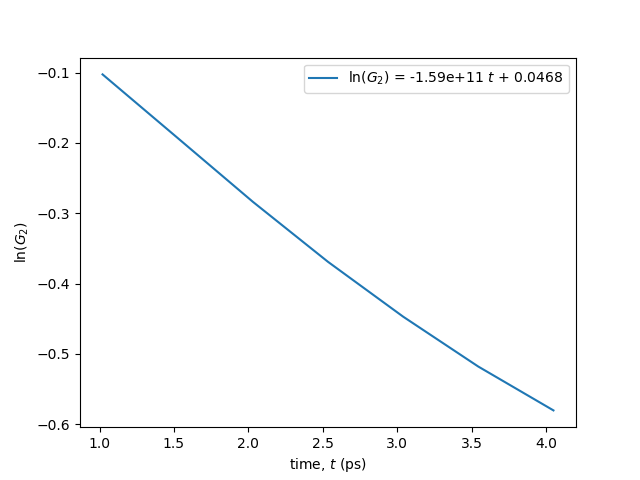

In [98]:
t_left = 0.8e-12
t_right = 4e-12

truncated_time_array = time_array[find_nearest(time_array, t_left):find_nearest(time_array, t_right)+1]
truncated_Gk_mean_array = Gk_mean_array[find_nearest(time_array, t_left):find_nearest(time_array, t_right)+1]
a,b = np.polyfit(truncated_time_array,np.log(truncated_Gk_mean_array),1)
if b < 0:
    bphrase = f"- {abs(b):.3}"
else:
    bphrase = f"+ {abs(b):.3}"
print(f"steps = {len(truncated_time_array)}; gf = {gf}; tau_a = {tau_a*1e12}ps; ln(G_{k}) = {a:.3} t {bphrase}")

plt.close()
if fixed_t_n == True:
    plt.figtext(0.99, -0.06, f"$\\tau_a$: {tau_a*1e12:.3} ps   $g$: {gf}    left $t$: {t_left*1e12:.4} ps    right $t$: {t_right*1e12:.4} ps\n mean transitions: {avg_transitions:.4}    cauchy factor:{cauchy_factor}    # of steps: {len(truncated_time_array)}    # of trials: {number_of_trials}",horizontalalignment='right')
else:
    plt.figtext(0.99, -0.06, f"$\\tau_n$: {tau_n*1e12:.3} ps    $\\tau_a$: {tau_a*1e12:.3} ps   $g$: {gf}    left $t$: {t_left*1e12:.4} ps    right $t$: {t_right*1e12:.4} ps\n mean transitions: {avg_transitions:.4}    cauchy factor:{cauchy_factor}    # of steps: {len(truncated_time_array)}    # of trials: {number_of_trials}",horizontalalignment='right')
plt.xlabel('time, $t$ (ps)')
plt.ylabel(f'ln($G_{k}$)')
plt.plot(truncated_time_array*1e12,np.log(truncated_Gk_mean_array),label=f'ln($G_{k}$) = {a:.3} $t$ {bphrase}')
plt.legend()
trunclogfig = plt.gcf()

In [84]:
# Save everything
# This is the name of the parent directory
parent_directory = f"Gk_diff {cauchy_factor}"

Path(f"{parent_directory}/{filename}").mkdir(parents=True)
with open(Path(f'{parent_directory}/{filename}/{filename}.csv'), 'w', newline='') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(zip(time_array,Gk_mean_array))
with open(Path(f'{parent_directory}/{filename}/{filename}_trunc_a={a:.3}.csv'), 'w', newline='') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(zip(truncated_time_array,truncated_Gk_mean_array))
linearfig.savefig(Path(f'{parent_directory}/{filename}/{filename}.pdf'),bbox_inches = 'tight')
logfig.savefig(Path(f'{parent_directory}/{filename}/{filename}_log.pdf'),bbox_inches = 'tight')
linearfig_unzoomed.savefig(Path(f'{parent_directory}/{filename}/{filename}_unzoomed.pdf'),bbox_inches = 'tight')
linearfig_unzoomed.savefig(Path(f'{parent_directory}/{filename}/{filename}_unzoomed.svg'),bbox_inches = 'tight')
trunclogfig.savefig(Path(f'{parent_directory}/{filename}/{filename}_log_trunc.pdf'),bbox_inches = 'tight')
linearfig.savefig(Path(f'{parent_directory}/{filename}/{filename}.svg'),bbox_inches = 'tight')
logfig.savefig(Path(f'{parent_directory}/{filename}/{filename}_log.svg'),bbox_inches = 'tight')
trunclogfig.savefig(Path(f'{parent_directory}/{filename}/{filename}_log_trunc.svg'),bbox_inches = 'tight')

# Save this a value
with open(Path(f'{parent_directory}/a-values_plunger.csv'), 'a') as csvFile:
    csvFile.write(f"{k},{tau_a}, {gf}, {truncated_time_array[0]}, {truncated_time_array[-1]},{len(truncated_time_array)},,{a}\n")
    
print(f"Files saved to directory '{Path(f'{parent_directory}/{filename}')}'")

Files saved to directory 'Gk_diff_plunger\G4diff1.0ps_1.0gf_0.001ps-120.0ps'
